### Question 1
The dataset used for this question is Question1_3.txt as the generated datasets were (3, 4, 3, 1)

The data file contains the times it takes for participants to respond to two versions of a web form.

##### 1. Make a maximum of two appropriate plot to show how the data are distributed and to show the difference between the two web forms. Explain why you used this type of plot. (2+2pts)


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
"""This cell is just to read the data from the file and store it in a dataframe."""
df = pd.read_csv('datasets/Question1_3.txt', sep="\t", header=0)
print("Minimum values of the two columns are: ", mins.values.min())

Minimum values of the two columns are:  17.89


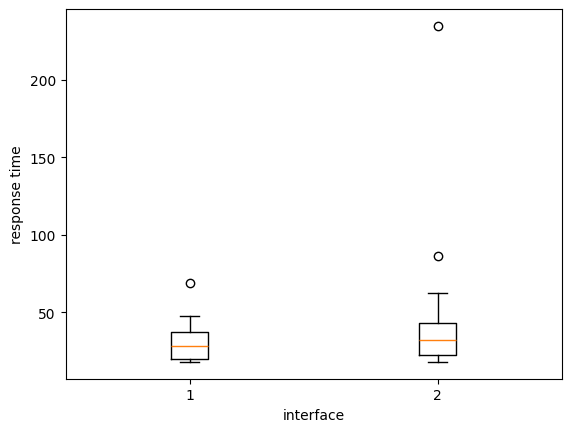

In [50]:
'''Cell makes boxplots of the datasets'''
plt.boxplot([df['interface1'], df['interface2']], labels=['1', '2'])
plt.xlabel('interface')
plt.ylabel('response time')
plt.show()

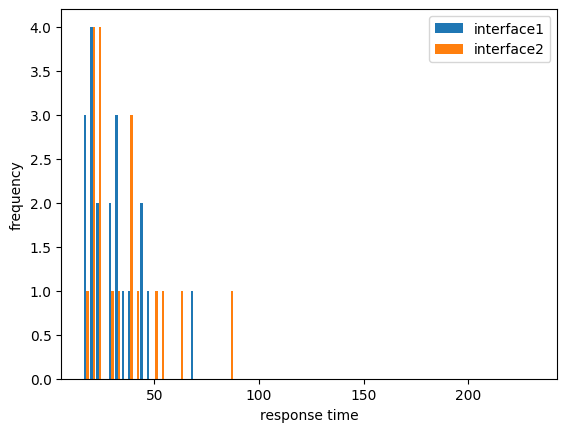

In [76]:
'''Cell makes boxplots of the datasets'''
mins = df.min()
maxs = df.max()
bins = range(int(mins.min() - 1) // 1, int(maxs.max() + 1) // 1, 3)
plt.hist([df['interface1'], df['interface2']], bins=bins, label=['interface1', 'interface2'])
plt.legend(loc='upper right')
plt.xlabel('response time')
plt.ylabel('frequency')
plt.show()

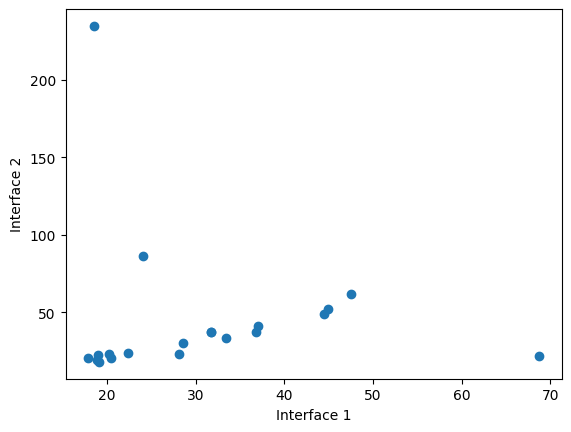

In [67]:
plt.scatter(x=df['interface1'],y=df['interface2'])
plt.xlabel('Interface 1')
plt.ylabel('Interface 2')
plt.show()

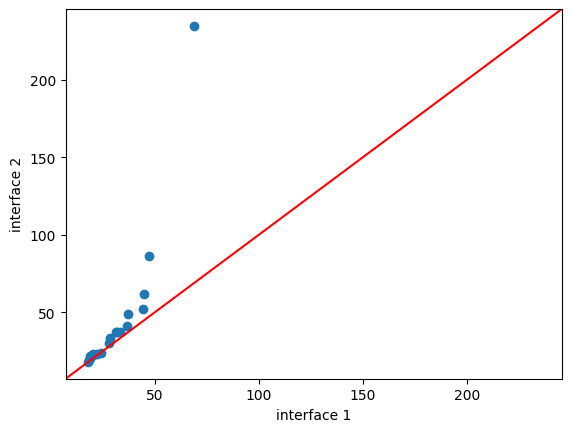

In [74]:
from statsmodels.graphics.gofplots import qqplot_2samples
qqplot_2samples(df['interface1'], df['interface2'], xlabel='interface 1', ylabel='interface 2', line='45')
plt.show()


## 2.
Test whether one of the web forms has faster responses. Explain what you did and why and what the underlying experimental design was. (2+2+2 pts.)
